In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('/content/laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [6]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [7]:
df.shape

(1303, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [9]:
df.isnull().sum()


,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [10]:
df['Company'].value_counts().index

Index(['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple',
       'Samsung', 'Mediacom', 'Razer', 'Microsoft', 'Vero', 'Xiaomi', 'Chuwi',
       'Fujitsu', 'Google', 'LG', 'Huawei'],
      dtype='object', name='Company')

**Exploratory Data Analysis (EDA)**

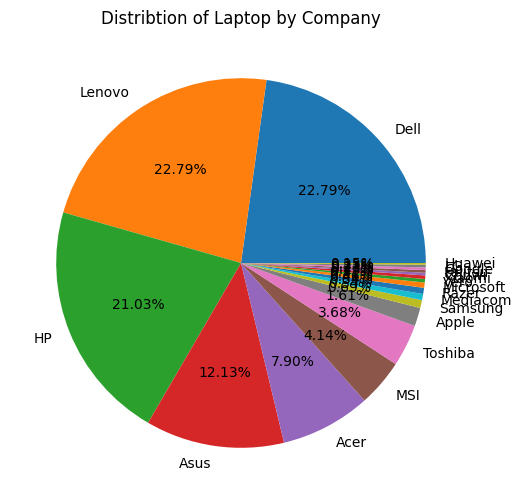

In [11]:
plt.figure(figsize=(12,6))
plt.pie(x=df['Company'].value_counts(),labels=df['Company'].value_counts().index,autopct='%1.2f%%')
plt.title("Distribtion of Laptop by Company")
plt.show()

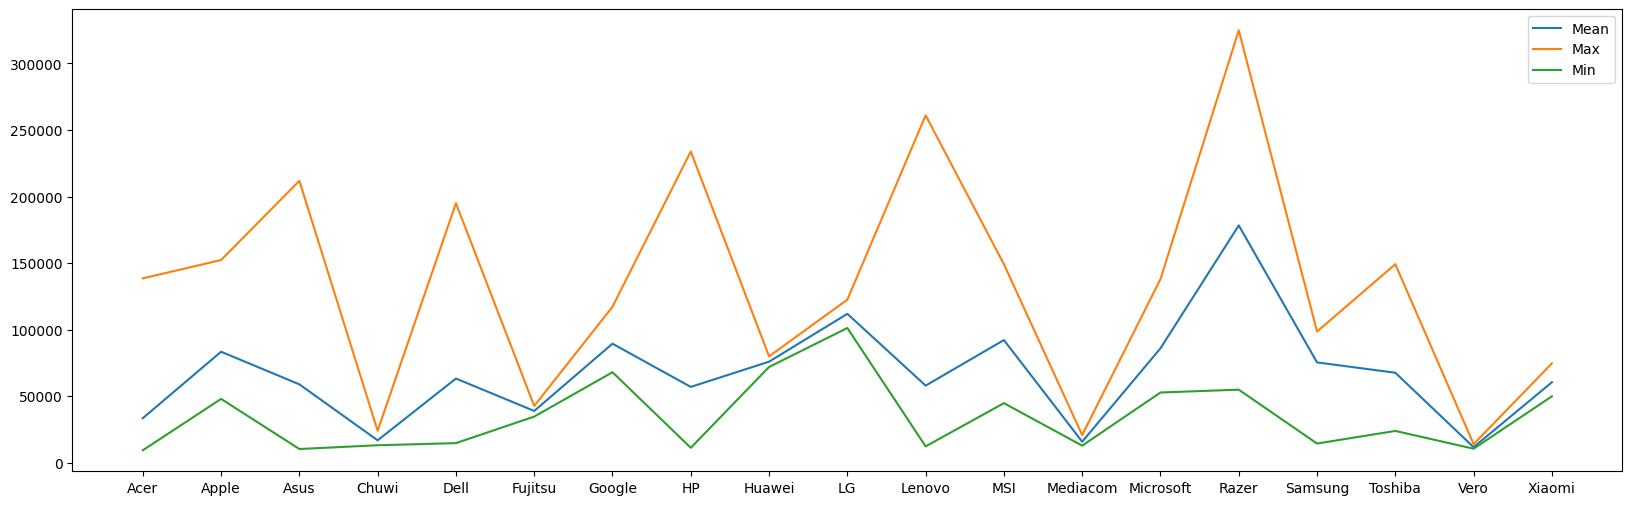

In [12]:
A = df.groupby('Company')['Price'].mean()
B = df.groupby('Company')['Price'].max()
C = df.groupby('Company')['Price'].min()

plt.figure(figsize=(20,6))
plt.plot(A.index,A,label='Mean')
plt.plot(B.index,B,label='Max')
plt.plot(C.index,C,label='Min')
plt.legend()


plt.show()


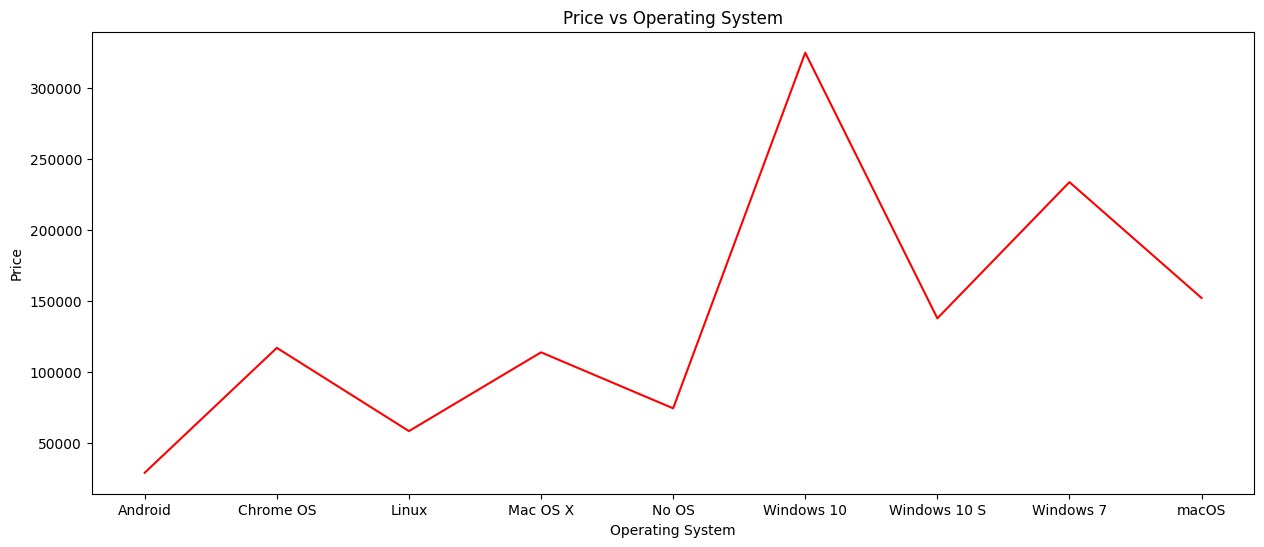

In [13]:
plt.figure(figsize=(15,6))
df.groupby('OpSys')['Price'].max().plot(kind='line', color = 'red')
plt.xlabel('Operating System')
plt.ylabel('Price')
plt.title('Price vs Operating System')
plt.show()

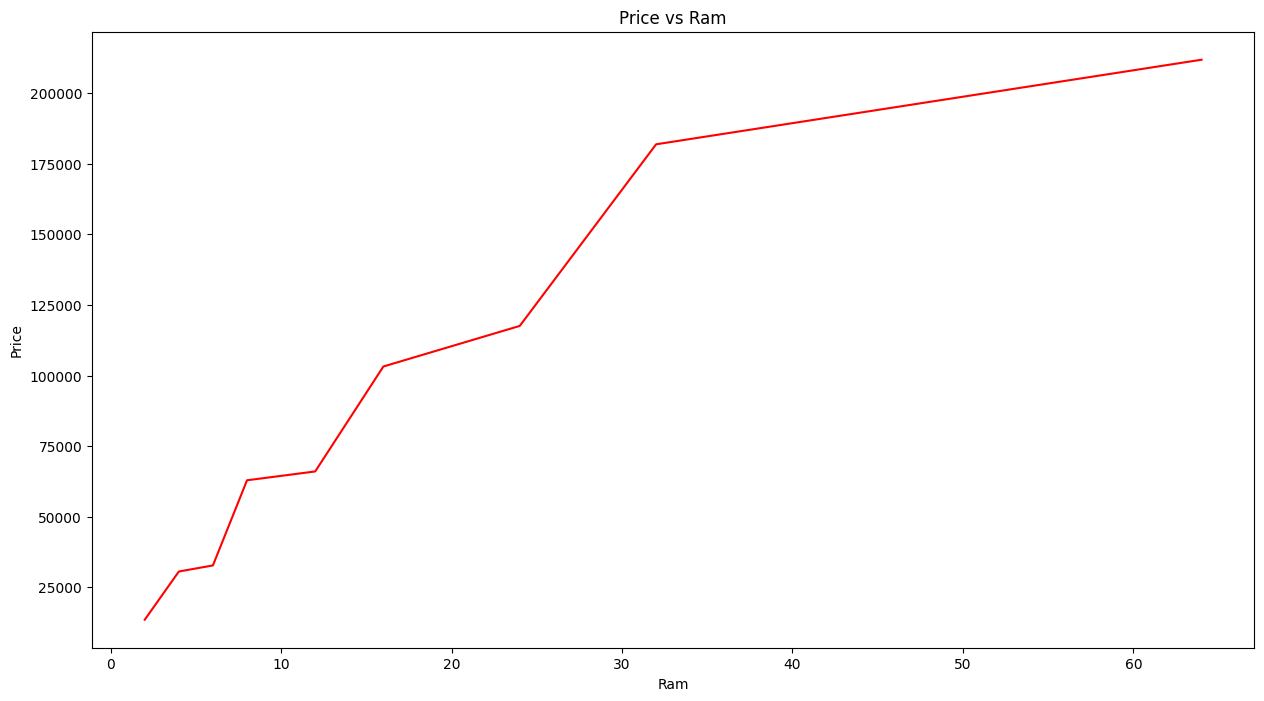

In [14]:
plt.figure(figsize=(15,8))
df.groupby('Ram')['Price'].mean().plot(kind='line',color='red')
plt.xlabel('Ram')
plt.ylabel('Price')
plt.title('Price vs Ram')
plt.show()

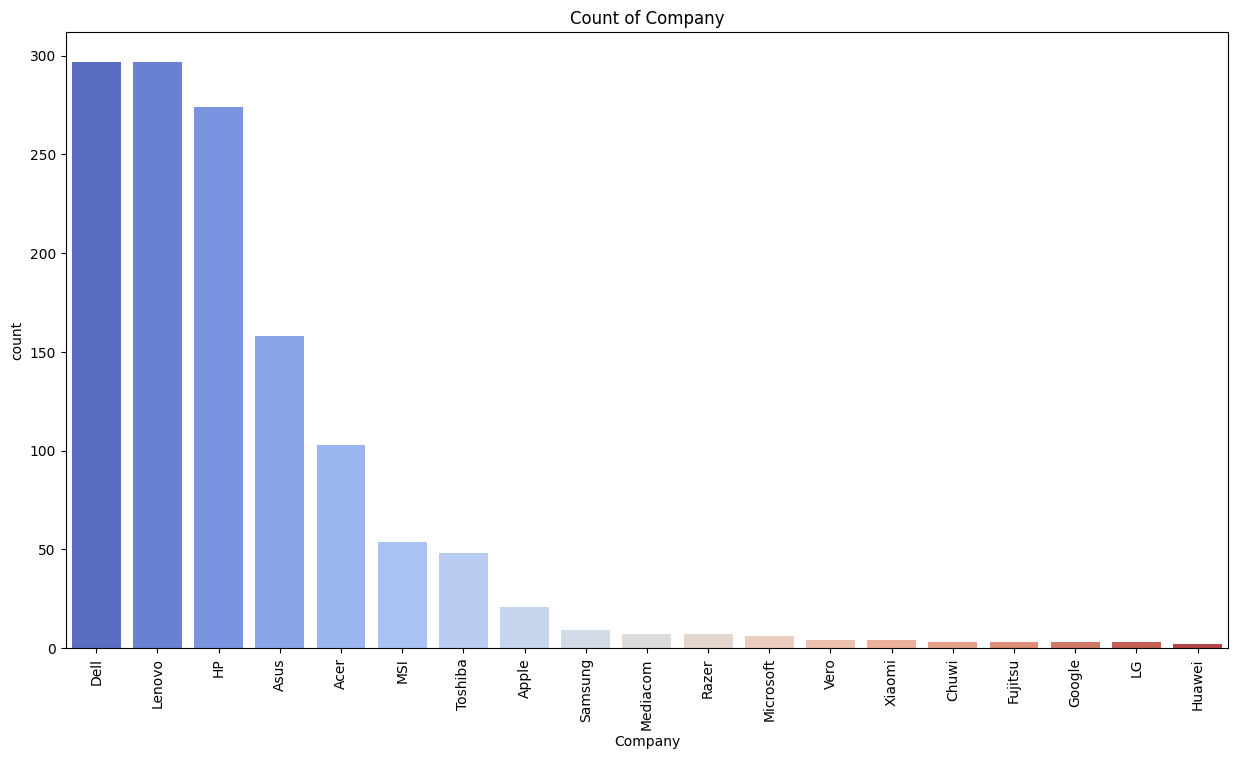

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='Company',order=df['Company'].value_counts().index,palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Count of Company')
plt.show()

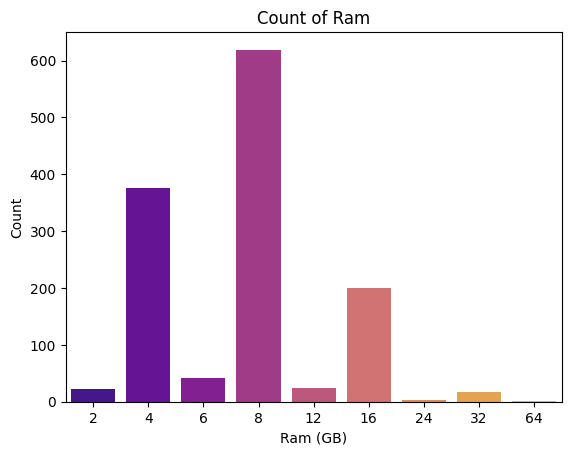

In [16]:
Y = df['Ram'].value_counts()
sns.barplot(x=Y.index,y=Y.values,palette='plasma')
plt.title('Count of Ram')
plt.xlabel('Ram (GB)')
plt.ylabel('Count')
plt.show()

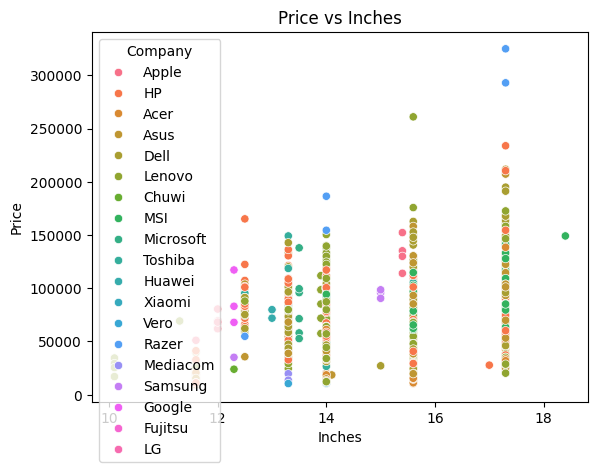

In [17]:
sns.scatterplot(data=df,x='Inches',y='Price',hue='Company')
plt.title('Price vs Inches')
plt.show()

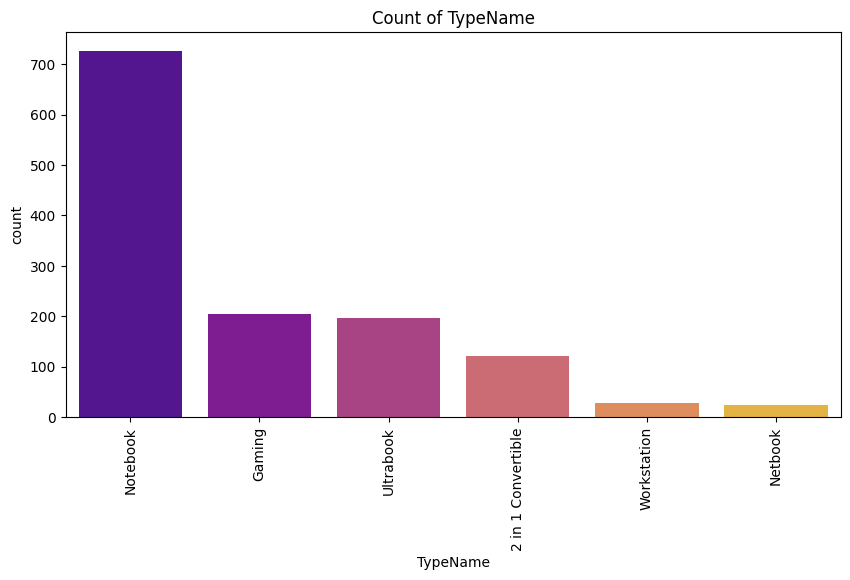

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='TypeName',order=df['TypeName'].value_counts().index,palette='plasma')
plt.title('Count of TypeName')
plt.xticks(rotation=90)
plt.show()

In [19]:
"""
plt.xticks(rotation='vertical')
viridis
set2
viridis"""

"\nplt.xticks(rotation='vertical')\nviridis\nset2\nviridis"

**Feature Engineering**

In [20]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [21]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [22]:
df = df.drop(columns='Gpu')

In [23]:
def cpu(input):
  if input == 'Windows 10' or input == 'Windows 7' or input == 'Windows 10 S':
    return 'Windows'
  elif input == 'Mac OS X' or input == 'macOS':
    return 'Mac'
  else:
    return 'No Os/linux/Android'

In [24]:
df['Os'] = df['OpSys'].apply(cpu)

In [25]:
df = df.drop(columns='OpSys')

In [26]:
df['cpu_name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [27]:
def cpu(input):
  if input == 'Intel Core i5' or input == 'Intel Core i7' or input == 'Intel Core i3':
    return input
  elif input.split()[0] == 'Intel':
    return 'Other Intel Processor'
  elif input.split()[0] == 'AMD':
    return 'AMD'
  else:
    return 'Other Processor'

In [28]:
df['cpu'] = df['cpu_name'].apply(cpu)

In [29]:
df = df.drop(columns=['Cpu','cpu_name'])

In [30]:
df = df.drop(columns=['Memory','ScreenResolution'])

In [31]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,Gpu_Brand,Os,cpu
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,0,Intel,Mac,Intel Core i5
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,0,Intel,Mac,Intel Core i5
2,HP,Notebook,15.6,8,1.86,30636.0000,0,Intel,No Os/linux/Android,Intel Core i5
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,0,AMD,Mac,Intel Core i7
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,0,Intel,Mac,Intel Core i5


In [32]:
x = df.drop(columns=['Price'])
y = df['Price']

In [33]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [34]:
Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape

((1042, 9), (1042,), (261, 9), (261,))

**Pipeline**

In [35]:
cat = ['Company','TypeName','Gpu_Brand','Os','cpu']
num = ['Inches','Ram','Weight','Touchscreen']

In [38]:
# PIPELINE FOR LINEAR REGRESSION

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)

lrg_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('lg',LinearRegression())
])

lrg_pipeline.fit(Xtrain,Ytrain)

print(f"testing score for linear regression {r2_score (Ytest,lrg_pipeline.predict(Xtest))}")

testing score for linear regression 0.7016892780143108


In [39]:
# PIPELINE FOR LASSO REGRESSION

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)

l_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('lasso',Lasso(alpha=1.0))
])

l_pipeline.fit(Xtrain,Ytrain)

print(f"testing score for lasso regression {r2_score(Ytest,l_pipeline.predict(Xtest))}")

testing score for lasso regression 0.70172126473855


In [40]:
# PIPELINE FOR RIDGE REGRESSION

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)

r_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('ridge',Ridge(alpha=1.0))
])

r_pipeline.fit(Xtrain,Ytrain)

print(f"testing score for ridge regression {r2_score(Ytest,r_pipeline.predict(Xtest))}")


testing score for ridge regression 0.6976840091549787


In [42]:
# PIPELINE FOR RANDOMFORESTREGRESSOR

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)

rf_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('rf',RandomForestRegressor(n_estimators=500, random_state=42))
])

rf_pipeline.fit(Xtrain,Ytrain)

print(f"testing score for random forest regression {r2_score(Ytest,rf_pipeline.predict(Xtest))}")
print("Mean Absolute Error :",mean_absolute_error(Ytest,rf_pipeline.predict(Xtest)))

testing score for random forest regression 0.783205581073587
Mean Absolute Error : 10647.506312208547


In [46]:
# PIPELINE FOR KNN

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)

knn_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('knn',KNeighborsRegressor(n_neighbors=5))
])

knn_pipeline.fit(Xtrain,Ytrain)

print("testing score for KNN : ",r2_score(Ytest,knn_pipeline.predict(Xtest)))



testing score for KNN :  0.7068782270596304


In [47]:
# PIPELINE FOR xGBOOST

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)

xgb_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('xgb',XGBRegressor(n_estimators=60, learning_rate=0.5, max_depth=5))
])

xgb_pipeline.fit(Xtrain,Ytrain)

print("testing score for xgboost : ",r2_score(Ytest,xgb_pipeline.predict(Xtest)))

testing score for xgboost :  0.7505792911511503


In [49]:
# PIPELINE FOR GRADIENT BOOST

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)

gb_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('gb',GradientBoostingRegressor(n_estimators=500))
])

gb_pipeline.fit(Xtrain,Ytrain)

print("testing score for gradient boosting : ",r2_score(Ytest,gb_pipeline.predict(Xtest)))

testing score for gradient boosting :  0.7772619795193929


In [55]:
# PIPELINE FOR DECISION TREE

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(),cat),
        ('num',StandardScaler(),num)
    ]
)

dt_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('dtr',DecisionTreeRegressor(max_depth=8))
])

dt_pipeline.fit(Xtrain,Ytrain)

print("testing score for decision tree : ",r2_score(Ytest,dt_pipeline.predict(Xtest)))

testing score for decision tree :  0.7155803244472595


**TESTING THE MODEL**

In [56]:
def laptop_pred(pipeline,input_data):
  input_df = pd.DataFrame([input_data])
  predicted_price = pipeline.predict(input_df)
  return predicted_price

In [57]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,Gpu_Brand,Os,cpu
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,0,Intel,Mac,Intel Core i5
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,0,Intel,Mac,Intel Core i5
2,HP,Notebook,15.6,8,1.86,30636.0000,0,Intel,No Os/linux/Android,Intel Core i5
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,0,AMD,Mac,Intel Core i7
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,0,Intel,Mac,Intel Core i5


In [60]:
input = {
    'Company':'Apple',
    'TypeName':'Ultrabook',
    'Inches':15.4,
    'Ram':16,
    'Weight':1.83,
    'Touchscreen':0,
    'Gpu_Brand':'AMD',
    'Os':'Mac',
    'cpu':'Intel Core i7'
}

prediction = laptop_pred(rf_pipeline,input)

print("Predicted Laptop Price : Rs",round(prediction[0],3))

Predicted Laptop Price : Rs 136191.481
